<a href="https://colab.research.google.com/github/UserMarcos/Master_IA/blob/main/07MIAR_Proyecto_Programacion_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


Enlace al fichero en colab:

https://colab.research.google.com/drive/17nJT7hfp3YMYDdNfeUhyH0fDmHd7WzX-?usp=sharing

Enlace de Github:

https://github.com/UserMarcos/Master_IA/blob/main/07MIAR_Proyecto_Programacion_Redes_Neuronales.ipynb

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

## Carga de datos desde la plataforma Kaggle

In [ ]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [1]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=36a2ba7614957e20c7428a29a8c0e65e2ec3b5d729c1f8675668e9c1e9c449b4
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [2]:
#%%capture
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                    title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                      1MB  2024-04-10 09:48:38           1904         35  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                              3KB  2024-03-02 18:50:30          28499        550  0.9411765        
anandshaw2001/customer-churn-dataset                   Customer Churn Dataset                         262KB  2024-04-09 18:41:58            773         21  1.0              
akankshaaa013/top-grossing-movies-dataset              Top Grossing Movies Dataset                     33KB  2024-04-08 08:29:47  

#### Descarga del __Dataset__ de los pájaros

In [5]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición
#!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!kaggle datasets download -d gpiosenka/100-bird-species

#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100% 1.95G/1.96G [00:16<00:00, 120MB/s]
100% 1.96G/1.96G [00:16<00:00, 131MB/s]


In [6]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [7]:
# Descomprimimos los datos y los dejamos listos para trabajar
%%capture
!unzip 100-bird-species.zip -d my_dataset

In [ ]:
#!unzip my_dataset/test.zip

In [8]:
#%%capture
!ls

100-bird-species.zip  kaggle.json  my_dataset  sample_data


## Carga a un _dataframe_
Cargamos en un _dataframe_ el fichero "my_dataset/birds.csv" y analizamos un poco los datos.

In [9]:
import pandas as pd
df = pd.read_csv("my_dataset/birds.csv")
display(df.sample(10))

#display(df[df["labels"]=="TAWNY FROGMOUTH"])

#print(df["labels"][0])
print("Numero de elementos:" ,len(df))

NDatos = df['data set'].value_counts()
print("Número del conjunto train:", NDatos['train'])
print("Número del conjunto valid:", NDatos['valid'])
print("Número del conjunto test:", NDatos['test'])
#print(df['data set'].value_counts())

# Cantidad de tipos de pájaros
nEspecies = df.nunique()['labels']
print("Número de especies:", nEspecies)

#df['filepaths'].unique()

,class id,filepaths,labels,data set,scientific name
51268,323.0,train/LITTLE AUK/045.jpg,LITTLE AUK,train,ALLE ALLE
51507,324.0,train/LOGGERHEAD SHRIKE/139.jpg,LOGGERHEAD SHRIKE,train,LANIUS LUDOVICIANUS
30212,189.0,train/DOUBLE EYED FIG PARROT/162.jpg,DOUBLE EYED FIG PARROT,train,CYCLOPSITTA DIOPHTHALMA
81012,505.0,train/WILLOW PTARMIGAN/075.jpg,WILLOW PTARMIGAN,train,LAGOPUS LAGOPUS
85179,108.0,test/BROWN HEADED COWBIRD/5.jpg,BROWN HEADED COWBIRD,test,MOLOTHRUS ATER
15100,96.0,train/BLUE GROSBEAK/079.jpg,BLUE GROSBEAK,train,PASSERINA CAERULEA
8376,52.0,train/BALD EAGLE/100.jpg,BALD EAGLE,train,HALIAEETUS LEUCOCEPHALUS
87485,45.0,valid/AVADAVAT/1.jpg,AVADAVAT,valid,AMANDAVA AMANDAVA
20694,130.0,train/CARMINE BEE-EATER/138.jpg,CARMINE BEE-EATER,train,MEROPS NUBICOIDES
75347,470.0,train/TIT MOUSE/104.jpg,TIT MOUSE,train,PARIDAE


Numero de elementos: 89885
Número del conjunto train: 84635
Número del conjunto valid: 2625
Número del conjunto test: 2625
Número de especies: 525


Mostramos una imagen aleatoria de ejemplo.

Ejemplo de imagen: my_dataset/train/BRANDT CORMARANT/138.jpg; Especie : BRANDT CORMARANT
Tamaño de imagen: (224, 224, 3)


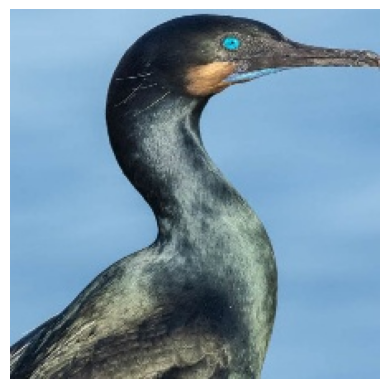

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Escogiendo y mostrando una imagen al azar del dataframe
idx = np.random.randint(0, len(df)-1)
Ruta = 'my_dataset/'+df["filepaths"][idx]
Label = df["labels"][idx]
print("Ejemplo de imagen: " + Ruta + "; Especie : " + Label)
try:
  img = cv2.imread(Ruta, cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.axis("off")
  plt.imshow(img)
  print("Tamaño de imagen:", img.shape)
except:
  print("Fallo")


Comprobamos si todas las rutas son válidas

In [11]:
# Buscamos rutas inválidas
#for file_path in df[df['data set']=='valid']["filepaths"]:
for file_path in df["filepaths"]:
  Ruta = 'my_dataset/'+file_path
  ##print(Ruta)
  try:
    img = cv2.imread(Ruta, cv2.COLOR_BGR2RGB)
    shape=img.shape
    #print(shape)
  except:
    print('Invalid image file:', file_path)


Invalid image file: train/PARAKETT  AKULET/038.jpg
Invalid image file: train/PARAKETT  AKULET/079.jpg
Invalid image file: train/PARAKETT  AKULET/137.jpg
Invalid image file: train/PARAKETT  AKULET/128.jpg
Invalid image file: train/PARAKETT  AKULET/005.jpg
Invalid image file: train/PARAKETT  AKULET/015.jpg
Invalid image file: train/PARAKETT  AKULET/018.jpg
Invalid image file: train/PARAKETT  AKULET/077.jpg
Invalid image file: train/PARAKETT  AKULET/007.jpg
Invalid image file: train/PARAKETT  AKULET/011.jpg
Invalid image file: train/PARAKETT  AKULET/012.jpg
Invalid image file: train/PARAKETT  AKULET/013.jpg
Invalid image file: train/PARAKETT  AKULET/014.jpg
Invalid image file: train/PARAKETT  AKULET/035.jpg
Invalid image file: train/PARAKETT  AKULET/003.jpg
Invalid image file: train/PARAKETT  AKULET/001.jpg
Invalid image file: train/PARAKETT  AKULET/016.jpg
Invalid image file: train/PARAKETT  AKULET/036.jpg
Invalid image file: train/PARAKETT  AKULET/067.jpg
Invalid image file: train/PARAK

Vemos que en el dataframe está mal escrito la carpeta "PARAKETT  AKULET". Vamos a corregirlo.

In [12]:
# Vemos que hay la carpeta con nombre "PARAKETT  AUKLET"
!ls my_dataset/train/PARAKETT\ \ AUKLET

!ls my_dataset/valid/PARAKETT\ AUKLET
!ls my_dataset/test/PARAKETT\ \ AUKLET

# Renombramos las carpetas
!mv my_dataset/train/PARAKETT\ \ AUKLET my_dataset/train/PARAKETT\ AUKLET
!mv my_dataset/test/PARAKETT\ \ AUKLET my_dataset/test/PARAKETT\ AUKLET

!ls my_dataset/train/PARAKETT\ AUKLET

001.jpg  016.jpg  031.jpg  046.jpg  061.jpg  076.jpg  091.jpg  106.jpg	121.jpg  136.jpg  151.jpg
002.jpg  017.jpg  032.jpg  047.jpg  062.jpg  077.jpg  092.jpg  107.jpg	122.jpg  137.jpg  152.jpg
003.jpg  018.jpg  033.jpg  048.jpg  063.jpg  078.jpg  093.jpg  108.jpg	123.jpg  138.jpg  153.jpg
004.jpg  019.jpg  034.jpg  049.jpg  064.jpg  079.jpg  094.jpg  109.jpg	124.jpg  139.jpg  154.jpg
005.jpg  020.jpg  035.jpg  050.jpg  065.jpg  080.jpg  095.jpg  110.jpg	125.jpg  140.jpg  155.jpg
006.jpg  021.jpg  036.jpg  051.jpg  066.jpg  081.jpg  096.jpg  111.jpg	126.jpg  141.jpg
007.jpg  022.jpg  037.jpg  052.jpg  067.jpg  082.jpg  097.jpg  112.jpg	127.jpg  142.jpg
008.jpg  023.jpg  038.jpg  053.jpg  068.jpg  083.jpg  098.jpg  113.jpg	128.jpg  143.jpg
009.jpg  024.jpg  039.jpg  054.jpg  069.jpg  084.jpg  099.jpg  114.jpg	129.jpg  144.jpg
010.jpg  025.jpg  040.jpg  055.jpg  070.jpg  085.jpg  100.jpg  115.jpg	130.jpg  145.jpg
011.jpg  026.jpg  041.jpg  056.jpg  071.jpg  086.jpg  101.jpg  116.jpg	131.

In [13]:
#filtro = df[df['col1'].str.contains("GRANEL", case=False)]

df2 = df[df['filepaths'].str.contains("PARAKETT  AKULET")]
display(df2.head(10))

df_corregido = df

df_corregido['filepaths'] = df['filepaths'].str.replace('PARAKETT  AKULET', 'PARAKETT AUKLET')

#df2 = df[df['filepaths'].str.contains("PARAKETT AKULET")]
#print(df2.head(10))

,class id,filepaths,labels,data set,scientific name
59400,373.0,train/PARAKETT AKULET/038.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59401,373.0,train/PARAKETT AKULET/079.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59402,373.0,train/PARAKETT AKULET/137.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59403,373.0,train/PARAKETT AKULET/128.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59404,373.0,train/PARAKETT AKULET/005.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59405,373.0,train/PARAKETT AKULET/015.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59406,373.0,train/PARAKETT AKULET/018.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59407,373.0,train/PARAKETT AKULET/077.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59408,373.0,train/PARAKETT AKULET/007.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA
59409,373.0,train/PARAKETT AKULET/011.jpg,PARAKETT AKULET,train,AETHIA PSITTACULA


Creamos los generadores de imagenes desde el _dataframe_.

Found 84635 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
<class 'keras.src.preprocessing.image.DataFrameIterator'>
84635
Tamaño de las imágenes generadas: (112, 112, 3)


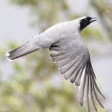

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

dimensiones = (img.shape[0]//2, img.shape[1]//2)

train_datagen = ImageDataGenerator(rescale=1./255 )
train_flow = train_datagen.flow_from_dataframe(df[df['data set']=='train'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=dimensiones)
valid_flow = train_datagen.flow_from_dataframe(df[df['data set']=='valid'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=dimensiones)
test_flow = train_datagen.flow_from_dataframe(df[df['data set']=='test'], directory="my_dataset/", x_col='filepaths', y_col='labels', target_size=dimensiones)

V = train_flow[0][0][0]

print(type(train_flow))
print(train_flow.n)
print("Tamaño de las imágenes generadas:", V.shape)


image.array_to_img(V)
#print(image.shape)

## Desde 0

Estrategia desde

### Estructura de la red

In [20]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# Definimos layer de entreda
input = layers.Input(shape=(V.shape[0], V.shape[1], V.shape[2]))

# 1.BASE MODEL

# Bloque 1
x1 = layers.Conv2D(16, (3,3), padding="same", activation="relu")(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(16, (3,3), padding="same", activation="relu")(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)

# Bloque 2
x2 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)

# Bloque 3
x3 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)

# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x3)
predictions = layers.Dense(nEspecies, activation="softmax")(gap)

# 3. Unimos las entradas y salidas del modelo
convnet_aug = Model(inputs=input, outputs=predictions)
convnet_aug.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 16)      448       
                                                                 
 batch_normalization_6 (Bat  (None, 112, 112, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 batch_normalization_7 (Bat  (None, 112, 112, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 16)        0   

In [21]:
from tensorflow.keras.optimizers import Adam

# Definicion de hiperparametros
batch_size=256
learning_rate=0.001
epochs=20

# Compilamos el modelo - modificamos loss para tener en cuenta ohe
convnet_aug.compile(optimizer=Adam(learning_rate=learning_rate),
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])


H = convnet_aug.fit(train_flow,
                    epochs=epochs,
                    steps_per_epoch=train_flow.n // batch_size,
                    validation_data=valid_flow)


Epoch 1/20
330/330 [==============================] - 433s 1s/step - loss: 6.0334 - accuracy: 0.0098 - val_loss: 6.2986 - val_accuracy: 0.0046
Epoch 2/20
330/330 [==============================] - 424s 1s/step - loss: 5.6380 - accuracy: 0.0272 - val_loss: 5.3931 - val_accuracy: 0.0320
Epoch 3/20
330/330 [==============================] - 406s 1s/step - loss: 5.3314 - accuracy: 0.0415 - val_loss: 5.2678 - val_accuracy: 0.0350
Epoch 4/20
330/330 [==============================] - 404s 1s/step - loss: 5.0652 - accuracy: 0.0621 - val_loss: 4.9700 - val_accuracy: 0.0670
Epoch 5/20
330/330 [==============================] - 424s 1s/step - loss: 4.8130 - accuracy: 0.0780 - val_loss: 4.7601 - val_accuracy: 0.0808
Epoch 6/20
330/330 [==============================] - 398s 1s/step - loss: 4.5735 - accuracy: 0.1102 - val_loss: 4.6219 - val_accuracy: 0.1040
Epoch 7/20
330/330 [==============================] - 420s 1s/step - loss: 4.3624 - accuracy: 0.1372 - val_loss: 4.2713 - val_accuracy: 0.1360

In [22]:
# Funciones base
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x, batch_size=128)
  print(classification_report(y, predictions.argmax(axis=1)))

83/83 [==============================] - 27s 321ms/step - loss: 2.3489 - accuracy: 0.4411
Accuracy: 44.11%


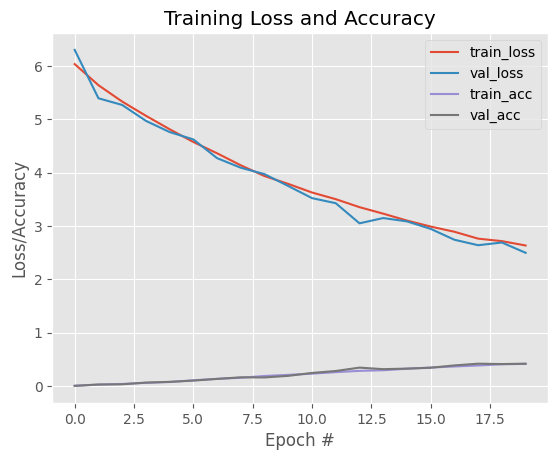

In [23]:
# Learning curves
visualize_learning_curve(H)

scores = convnet_aug.evaluate(test_flow)
print("Accuracy: %.2f%%" % (scores[1]*100))

## Estrategia red pre-entrenada

In [24]:
from tensorflow.keras.applications import VGG16


# Cargar arquitectura y pesos: quitamos el top model para ajustarlo a nuestra tarea.
base_model = VGG16(weights="imagenet",
                   include_top=False,
                   input_shape=(V.shape[0], V.shape[1], V.shape[2]))
base_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 112, 112, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 112, 112, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 56, 56, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 56, 56, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 56, 56, 128)       147584    
                                                              

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# No entrenamos el base model
base_model.trainable = False

# Conectar el modelo con el top model
tl_model = Sequential()
tl_model.add(base_model)
tl_model.add(layers.Flatten())
# tl_model.add(layers.Dense(256, activation="relu"))
tl_model.add(layers.Dense(nEspecies, activation="softmax"))
tl_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 525)               2419725   
                                                                 
Total params: 17134413 (65.36 MB)
Trainable params: 2419725 (9.23 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Compilamos el modelo - modificamos loss para tener en cuenta ohe
tl_model.compile(optimizer=Adam(learning_rate=learning_rate),
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])


H = tl_model.fit(train_flow,
                    epochs=epochs,
                    steps_per_epoch=train_flow.n // batch_size,
                    validation_data=valid_flow)

Epoch 1/20
330/330 [==============================] - 1713s 5s/step - loss: 5.3302 - accuracy: 0.1234 - val_loss: 3.9573 - val_accuracy: 0.2518
Epoch 2/20
330/330 [==============================] - 1744s 5s/step - loss: 3.6137 - accuracy: 0.3158 - val_loss: 3.2044 - val_accuracy: 0.3493
Epoch 3/20
330/330 [==============================] - 1752s 5s/step - loss: 3.0019 - accuracy: 0.4026 - val_loss: 2.8366 - val_accuracy: 0.4152
Epoch 4/20
330/330 [==============================] - 1699s 5s/step - loss: 2.6209 - accuracy: 0.4658 - val_loss: 2.7134 - val_accuracy: 0.4343
Epoch 5/20
330/330 [==============================] - 1751s 5s/step - loss: 2.3614 - accuracy: 0.5128 - val_loss: 2.5571 - val_accuracy: 0.4549
Epoch 6/20
330/330 [==============================] - ETA: 0s - loss: 2.0884 - accuracy: 0.5656

In [ ]:
# Learning curves
visualize_learning_curve(H)

scores = tl_model.evaluate(test_flow)
print("Accuracy: %.2f%%" % (scores[1]*100))